## <b> <span style='color:#e61227'>|</span> Traffic Signs Detection Using YOLOv8 </b> 

![](https://learnopencv.com/wp-content/uploads/2023/01/evolution-of-yolo-models-1024x576.png)

[Introduction](#Introduction:)

[YOLOv8](#YOLOv8:)

[Install And Import Essential Libreries](#Install-And-Import-Essential-Libreries:)

[Load Data](#Load-Data:)

[Try Pre-trained YOLOv8 For Detect Traffic Signs](#Try-Pre-trained-YOLOv8-For-Detect-Traffic-Signs:)

[Model Training](#Model-Training:)

[Validation of the Model By TestSet](#Validation-of-the-Model-By-TestSet:)

[Making Prediction:](#Making-Prediction::)

[Predict By Pr-Trained YOLOv8](#Predict-By-Pr-Trained-YOLOv8:)

# <p style="background-color:#1a8cff;font-family:newtimeroman;color:white;text-align:center;font-size:120%;border-radius:20px 60px;">Introduction:</p>

**Computer vision** is a field of artificial intelligence that focuses on teaching computers to interpret and understand visual information. One popular and powerful technique used in computer vision for object detection is called **YOLO**, which stands for "You Only Look Once".

YOLO aims to identify and locate objects in an image or video stream in real-time. Unlike traditional methods that rely on complex pipelines and multiple passes, YOLO takes a different approach by treating object detection as a single regression problem.

This algorithm divides the input image into a grid and predicts bounding boxes and class probabilities for objects within each grid cell. It simultaneously predicts the class labels and their corresponding bounding boxes, making it incredibly efficient and fast. YOLO is known for its real-time performance, enabling it to process images and videos at impressive speeds.

By leveraging **deep convolutional neural networks**, YOLO can learn to recognize a wide range of objects and accurately localize them within an image. It can detect multiple objects of different classes simultaneously, making it particularly useful for applications where **real-time processing** and high detection accuracy are crucial, such as **autonomous driving**, **video surveillance**, and **robotics**.


# <p style="background-color:#1a8cff;font-family:newtimeroman;color:white;text-align:center;font-size:120%;border-radius:20px 60px;">YOLOv8:</p>



**YOLOv8** is the latest version of the YOLO AI model developed by **Ultralytics**, which has shown effectiveness in tackling tasks such as **classification**, **object detection**, and **image segmentation**. **YOLOv8 models** are fast, accurate, and easy to use, making them ideal for various object detection and image segmentation tasks. They can be trained on large datasets and run on diverse hardware platforms, from **CPUs** to **GPUs**.
YOLOv8 _detection_ models have no suffix and are the default YOLOv8 models, i.e. **yolov8n.pt** ,and are pre-trained on COCO. See [Detection Docs ](https://docs.ultralytics.com/tasks/detect/) for full details.

 # <p style="background-color:#1a8cff;font-family:newtimeroman;color:white;text-align:center;font-size:120%;border-radius:20px 60px;">Install And Import Essential Libreries:</p>

In [1]:
# Install Essential Libraries
!pip install ultralytics

In [2]:
# Import Essential Libraries
import os
import random
import pandas as pd
from PIL import Image
import cv2
from ultralytics import YOLO
from IPython.display import Video
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')
import pathlib
import glob
from tqdm.notebook import trange, tqdm
import warnings
warnings.filterwarnings('ignore')

 # <p style="background-color:#1a8cff;font-family:newtimeroman;color:white;text-align:center;font-size:120%;border-radius:20px 60px;">Load Dataset:</p>

***3.1.1. Show Some Images From TrainSet***

In [ ]:
Image_dir = 'C:/Users/Dhairya Parikh\Desktop/PROJECT-1-Real Time Traffic Sign Detection Using YOLOv8/datasets/Self-Driving Cars.v6-version-4-prescan-416x416.yolov8/train\images'

num_samples = 9
image_files = os.listdir(Image_dir)

# Randomly select num_samples images
rand_images = random.sample(image_files, num_samples)

fig, axes = plt.subplots(3, 3, figsize=(11, 11))

for i in range(num_samples):
    image = rand_images[i]
    ax = axes[i // 3, i % 3]
    ax.imshow(plt.imread(os.path.join(Image_dir, image)))
    ax.set_title(f'Image {i+1}')
    ax.axis('off')

plt.tight_layout()
plt.show()

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'C:/Users/Dhairya Parikh/Desktop/PROJECT-1-Real Time Traffic Sign Detection Using YOLOv8/Self-Driving Cars.v6-version-4-prescan-416x416.yolov8/train/images'

***3.1.2. Get Shape Of An Image For Using In Training Step***

In [4]:
# Get the size of the image
image = cv2.imread("C:/Users/Dhairya Parikh/Desktop/PROJECT-1-Real Time Traffic Sign Detection Using YOLOv8/Self-Driving Cars.v6-version-4-prescan-416x416.yolov8/train/images/000000_jpg.rf.b11f308f16626f9f795a148029c46d10.jpg")
h, w, c = image.shape
print(f"The image has dimensions {w}x{h} and {c} channels.")

The image has dimensions 416x416 and 3 channels.


# <p style="background-color:#1a8cff;font-family:newtimeroman;color:white;text-align:center;font-size:120%;border-radius:20px 60px;">Try Pre-trained YOLOv8 For Detect Traffic Signs:</p>


image 1/1 C:\Users\Dhairya Parikh\Desktop\PROJECT-1-Real Time Traffic Sign Detection Using YOLOv8\Self-Driving Cars.v6-version-4-prescan-416x416.yolov8\train\images\FisheyeCamera_1_00000_png.rf.e5b5dc4c68b21c64cf6331dc8e354af3.jpg: 416x416 (no detections), 13.8ms
Speed: 0.0ms preprocess, 13.8ms inference, 25.1ms postprocess per image at shape (1, 3, 416, 416)


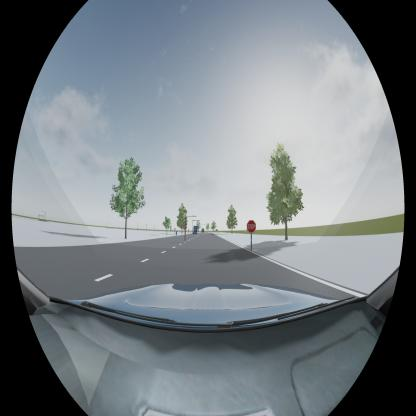

In [5]:
# Use a pretrained YOLOv8n model
model = YOLO("yolov8n.pt") 

# Use the model to detect object
image = "C:/Users/Dhairya Parikh/Desktop/PROJECT-1-Real Time Traffic Sign Detection Using YOLOv8/Self-Driving Cars.v6-version-4-prescan-416x416.yolov8/train/images/FisheyeCamera_1_00000_png.rf.e5b5dc4c68b21c64cf6331dc8e354af3.jpg"
result_predict = model.predict(source = image, imgsz=(416))

# show results
plot = result_predict[0].plot()
plot = cv2.cvtColor(plot, cv2.COLOR_BGR2RGB)
display(Image.fromarray(plot))

# <p style="background-color:#1a8cff;font-family:newtimeroman;color:white;text-align:center;font-size:120%;border-radius:20px 60px;">Model Training:</p>

        
***Mean Average Precision (mAP)*** is a metric used to evaluate the effectiveness of object detection algorithms in identifying and locating objects within images. It takes into account both precision and recall across different categories. By calculating the Average Precision (AP) for each category and taking the average, mAP provides an overall assessment of the algorithm's performance.

If the obtained mAP after the final epoch is not satisfactory, there are several options available to improve the results:
- Extending the training process by increasing the number of **epochs**: Training for more epochs allows the model to learn more patterns and potentially improve its performance. You can specify a higher value for the --epochs argument when running the training command.
- Experimenting with different **parameter values**: You can try adjusting various parameters to see if they have a positive impact on the results. Some parameters to consider are:
- **Batch Size:** Changing the batch size can affect the convergence and generalization of the model. You can modify the --batch-size argument to find an optimal value.
- **Initial Learning Rate (lr0)**: The initial learning rate determines the step size at the beginning of the training process. You can tune the --lr0 parameter to control how quickly the model learns.
- **Learning Rate Range (lrf)**: The learning rate range determines the range of learning rates used during the training. Experimenting with different values for --lrf can help find a better learning rate schedule.
- **Selecting a different optimizer**: The optimizer is responsible for updating the model's parameters based on the calculated gradients. Changing the optimizer can sometimes lead to better convergence and results. Ultralytics YOLOv8 supports different optimizers such as SGD, Adam, and RMSprop. You can try using a different optimizer by modifying the --optimizer argument.

For more details on resuming interrupted trainings and additional training options, you can refer to the Ultralytics YOLOv8 documentation.
        
In order to optimize the performance of the model, we have conducted experiments with different parameter values and optimizers. During the training phase, I explored various combinations of epochs, batch sizes, initial learning rates (lr0), and dropout values. The following values were used for experimentation:

- Epochs: ***10***, ***50***, ***100***
- Batch sizes: ***8***, ***16***, ***32***, ***64***
- Initial learning rates (lr0): ***0.001***, ***0.0003***, ***0.0001***
- Dropout: ***0.15***, ***0.25***

Furthermore, we have evaluated the model's performance using different optimizers, including **Adam**, **SGD**, and **auto**. By employing these optimizers, we aimed to assess their impact on the model's convergence and overall results.

After rigorous experimentation and training, we are pleased to present the results of our findings. The performance of the YOLOv8 model was assessed based on various metrics, including Mean Average Precision (mAP). 


***5.1.1. Training Step***

In [ ]:
# Build from YAML and transfer weights
Final_model = YOLO('yolov8n.yaml').load('/kaggle/working/yolov8n.pt')  

# Training The Final Model
Result_Final_model = Final_model.train(data="C:/Users/Dhairya Parikh/Desktop/PROJECT-1-Real Time Traffic Sign Detection Using YOLOv8/datasets/Self-Driving Cars.v6-version-4-prescan-416x416.yolov8/data.yaml",epochs=10, imgsz = 416, batch = 64 ,lr0=0.0001, dropout= 0.15, device = 0)


Transferred 355/355 items from pretrained weights
New https://pypi.org/project/ultralytics/8.3.28 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.27  Python-3.9.7 torch-2.5.1+cu124 CUDA:0 (NVIDIA GeForce RTX 3060 Laptop GPU, 6144MiB)
engine\trainer: task=detect, mode=train, model=yolov8n.yaml, data=C:/Users/Dhairya Parikh/Desktop/PROJECT-1-Real Time Traffic Sign Detection Using YOLOv8/datasets/Self-Driving Cars.v6-version-4-prescan-416x416.yolov8/data.yaml, epochs=100, time=None, patience=100, batch=64, imgsz=416, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=train11, exist_ok=False, pretrained=/kaggle/working/yolov8n.pt, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.15, val=True, split=val, save_json=False, save_hybrid=False, conf=Non

train: Scanning C:\Users\Dhairya Parikh\Desktop\PROJECT-1-Real Time Traffic Sign Detection Using YOLOv8\datasets\Self-Driving Cars.v6-version-4-prescan-416x416.yolov8\train\labels... 3530 images, 3 backgrounds, 0 corrupt: 100%|██████████| 3530/3530 [00:06<00:00, 526.50it/s]


train: New cache created: C:\Users\Dhairya Parikh\Desktop\PROJECT-1-Real Time Traffic Sign Detection Using YOLOv8\datasets\Self-Driving Cars.v6-version-4-prescan-416x416.yolov8\train\labels.cache


val: Scanning C:\Users\Dhairya Parikh\Desktop\PROJECT-1-Real Time Traffic Sign Detection Using YOLOv8\datasets\Self-Driving Cars.v6-version-4-prescan-416x416.yolov8\valid\labels... 801 images, 0 backgrounds, 0 corrupt: 100%|██████████| 801/801 [00:02<00:00, 298.61it/s]


val: New cache created: C:\Users\Dhairya Parikh\Desktop\PROJECT-1-Real Time Traffic Sign Detection Using YOLOv8\datasets\Self-Driving Cars.v6-version-4-prescan-416x416.yolov8\valid\labels.cache
Plotting labels to runs\detect\train11\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.0001' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000526, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added 
Image sizes 416 train, 416 val
Using 8 dataloader workers
Logging results to runs\detect\train11
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100       3.7G     0.8383      3.497      1.089         26        416: 100%|██████████| 56/56 [00:16<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.63it/s]

                   all        801        944     0.0477      0.797      0.145      0.123



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      3.64G     0.7236      2.316      1.015         17        416: 100%|██████████| 56/56 [00:13<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.66it/s]

                   all        801        944      0.303      0.356      0.273      0.222



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      3.63G     0.7124      1.962      1.006         20        416: 100%|██████████| 56/56 [00:14<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.66it/s]

                   all        801        944      0.381      0.446      0.398      0.313



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      3.66G     0.7055      1.693     0.9907         19        416: 100%|██████████| 56/56 [00:13<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.62it/s]

                   all        801        944      0.573       0.47      0.482      0.391



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      3.64G     0.6817       1.48     0.9749         30        416: 100%|██████████| 56/56 [00:13<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.71it/s]

                   all        801        944      0.603      0.632      0.666      0.558



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      3.67G     0.6668      1.343     0.9703         15        416: 100%|██████████| 56/56 [00:14<00:00,  3.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.64it/s]

                   all        801        944      0.761      0.658      0.721      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      3.64G     0.6537      1.226     0.9625         22        416: 100%|██████████| 56/56 [00:13<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.72it/s]

                   all        801        944      0.707      0.699      0.738      0.628



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      3.66G     0.6498      1.113     0.9645         20        416: 100%|██████████| 56/56 [00:13<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.66it/s]

                   all        801        944      0.766      0.681      0.755      0.633



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      3.66G      0.637      1.048     0.9563         21        416: 100%|██████████| 56/56 [00:13<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.65it/s]

                   all        801        944       0.75      0.643      0.718      0.588



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      3.66G     0.6272      1.021     0.9521         19        416: 100%|██████████| 56/56 [00:13<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.68it/s]

                   all        801        944      0.871       0.75      0.833      0.709



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      3.63G     0.6284     0.9734     0.9514         18        416: 100%|██████████| 56/56 [00:13<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.62it/s]

                   all        801        944      0.867       0.75      0.838      0.703



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      3.65G     0.6236     0.9338      0.947         24        416: 100%|██████████| 56/56 [00:14<00:00,  3.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.69it/s]

                   all        801        944      0.906      0.759      0.848      0.717



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      3.64G     0.6102     0.8803     0.9467         19        416: 100%|██████████| 56/56 [00:13<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.75it/s]

                   all        801        944      0.863      0.772      0.851      0.728



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      3.64G     0.5944     0.8742     0.9395         27        416: 100%|██████████| 56/56 [00:14<00:00,  3.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.59it/s]

                   all        801        944      0.907      0.766      0.858      0.734



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      3.66G     0.5923     0.8351      0.938         27        416: 100%|██████████| 56/56 [00:13<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.70it/s]


                   all        801        944      0.897      0.785      0.866      0.734

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      3.66G     0.5992     0.8051     0.9393         21        416: 100%|██████████| 56/56 [00:13<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.77it/s]

                   all        801        944      0.931      0.791      0.871      0.748



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      3.66G     0.5919     0.7966     0.9395         24        416: 100%|██████████| 56/56 [00:13<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.52it/s]

                   all        801        944      0.921      0.796      0.874      0.742



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      3.66G      0.583     0.7667     0.9401         20        416: 100%|██████████| 56/56 [00:14<00:00,  3.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.62it/s]

                   all        801        944      0.916      0.782      0.874      0.739



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      3.66G     0.5786     0.7649     0.9381         22        416: 100%|██████████| 56/56 [00:14<00:00,  3.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.66it/s]

                   all        801        944      0.939      0.777      0.873      0.743



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      3.66G     0.5856     0.7366      0.933         20        416: 100%|██████████| 56/56 [00:14<00:00,  3.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.63it/s]

                   all        801        944      0.923      0.794      0.877      0.753



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      3.63G     0.5765     0.7374      0.932         17        416: 100%|██████████| 56/56 [00:14<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.66it/s]

                   all        801        944      0.877      0.814      0.871      0.746



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      3.66G     0.5717     0.7295     0.9358         14        416: 100%|██████████| 56/56 [00:14<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.61it/s]

                   all        801        944      0.911      0.822      0.891      0.762



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      3.66G     0.5681      0.723     0.9293         20        416: 100%|██████████| 56/56 [00:14<00:00,  3.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.66it/s]

                   all        801        944       0.94      0.824      0.895      0.765



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      3.66G     0.5601     0.6869     0.9289         17        416: 100%|██████████| 56/56 [00:14<00:00,  3.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.62it/s]


                   all        801        944      0.929      0.805      0.888      0.762

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      3.66G      0.575     0.6999     0.9325         22        416: 100%|██████████| 56/56 [00:14<00:00,  3.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.64it/s]

                   all        801        944      0.924      0.819      0.895      0.767



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      3.66G     0.5587     0.6879     0.9309         19        416: 100%|██████████| 56/56 [00:14<00:00,  3.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.69it/s]

                   all        801        944      0.936      0.823      0.891      0.763



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      3.69G     0.5596      0.667     0.9254         23        416: 100%|██████████| 56/56 [00:14<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.64it/s]

                   all        801        944      0.922      0.822      0.894      0.764



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      3.66G     0.5587     0.6751     0.9266         30        416: 100%|██████████| 56/56 [00:14<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.66it/s]


                   all        801        944      0.911      0.822      0.895      0.767

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      3.63G     0.5502     0.6581     0.9255         20        416: 100%|██████████| 56/56 [00:14<00:00,  3.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.65it/s]

                   all        801        944      0.944      0.798      0.886      0.764



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      3.64G     0.5547     0.6513     0.9264         26        416: 100%|██████████| 56/56 [00:13<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.66it/s]

                   all        801        944      0.916      0.834      0.899      0.779



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      3.65G     0.5483     0.6373     0.9233         23        416: 100%|██████████| 56/56 [00:14<00:00,  3.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.69it/s]

                   all        801        944      0.926      0.827      0.894      0.771



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      3.63G     0.5515     0.6284      0.923         17        416: 100%|██████████| 56/56 [00:14<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.66it/s]

                   all        801        944      0.954      0.843      0.918      0.794



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      3.64G      0.545     0.6353     0.9231         27        416: 100%|██████████| 56/56 [00:14<00:00,  3.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.68it/s]

                   all        801        944      0.952      0.835      0.911      0.791



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      3.64G     0.5419      0.616     0.9189         22        416: 100%|██████████| 56/56 [00:14<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.82it/s]

                   all        801        944      0.934      0.845      0.907      0.787



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      3.66G      0.546     0.6195     0.9225         20        416: 100%|██████████| 56/56 [00:14<00:00,  3.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.65it/s]

                   all        801        944      0.932      0.831      0.906      0.784



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      3.63G     0.5407     0.6108     0.9208         20        416: 100%|██████████| 56/56 [00:14<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.67it/s]

                   all        801        944      0.914      0.856      0.911      0.784



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      3.65G     0.5415     0.6108     0.9189         33        416: 100%|██████████| 56/56 [00:14<00:00,  3.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.75it/s]

                   all        801        944      0.914      0.861      0.915      0.782



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      3.66G      0.541      0.607     0.9205         24        416: 100%|██████████| 56/56 [00:14<00:00,  3.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.80it/s]


                   all        801        944      0.954      0.833       0.91      0.789

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      3.66G     0.5319     0.5894     0.9163         28        416: 100%|██████████| 56/56 [00:14<00:00,  3.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.72it/s]

                   all        801        944      0.936      0.831      0.912      0.787



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      3.66G     0.5271     0.5923      0.918         20        416: 100%|██████████| 56/56 [00:14<00:00,  3.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.73it/s]


                   all        801        944      0.929       0.86      0.919      0.789

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      3.63G     0.5258     0.5697     0.9151         21        416: 100%|██████████| 56/56 [00:13<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.84it/s]

                   all        801        944      0.957      0.842       0.92      0.798



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      3.66G     0.5241     0.5789     0.9127         21        416: 100%|██████████| 56/56 [00:14<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.72it/s]

                   all        801        944      0.931      0.859      0.916      0.795



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      3.65G     0.5251     0.5776     0.9146         18        416: 100%|██████████| 56/56 [00:14<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.67it/s]

                   all        801        944      0.956      0.844      0.921       0.79



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      3.66G     0.5224     0.5823     0.9168         16        416: 100%|██████████| 56/56 [00:14<00:00,  3.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.73it/s]

                   all        801        944      0.935      0.829        0.9      0.777



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      3.63G      0.522     0.5674      0.912         24        416: 100%|██████████| 56/56 [00:14<00:00,  3.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.69it/s]

                   all        801        944      0.917      0.836      0.905      0.783



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      3.66G      0.525     0.5552     0.9134         23        416: 100%|██████████| 56/56 [00:14<00:00,  3.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.73it/s]

                   all        801        944      0.922      0.859       0.92      0.799



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      3.63G     0.5174     0.5521     0.9145         29        416: 100%|██████████| 56/56 [00:14<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.66it/s]

                   all        801        944      0.937      0.856      0.919      0.799



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      3.66G     0.5148     0.5506     0.9133         31        416: 100%|██████████| 56/56 [00:14<00:00,  3.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.67it/s]

                   all        801        944      0.937      0.854       0.92      0.802



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      3.65G     0.5171     0.5348     0.9122         22        416: 100%|██████████| 56/56 [00:14<00:00,  3.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.66it/s]

                   all        801        944       0.96      0.845       0.92      0.792



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      3.66G     0.5151     0.5505     0.9111         24        416: 100%|██████████| 56/56 [00:13<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.85it/s]


                   all        801        944       0.94      0.852      0.916      0.791

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      3.66G     0.5156      0.539     0.9164         12        416: 100%|██████████| 56/56 [00:14<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.70it/s]

                   all        801        944       0.94      0.861      0.921      0.799



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      3.64G     0.5149      0.529     0.9096         27        416: 100%|██████████| 56/56 [00:14<00:00,  3.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.73it/s]

                   all        801        944      0.935      0.864       0.92      0.801



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      3.63G     0.5124     0.5404     0.9141         26        416: 100%|██████████| 56/56 [00:14<00:00,  3.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.81it/s]

                   all        801        944      0.946       0.84      0.912      0.796



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      3.63G     0.5057     0.5102     0.9122         20        416: 100%|██████████| 56/56 [00:14<00:00,  3.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.69it/s]

                   all        801        944      0.956      0.854      0.921      0.802



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      3.65G     0.5009     0.5296     0.9123         24        416: 100%|██████████| 56/56 [00:14<00:00,  3.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.72it/s]

                   all        801        944      0.937      0.865      0.926      0.802



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      3.63G     0.4967     0.5224      0.908         26        416: 100%|██████████| 56/56 [00:14<00:00,  3.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.63it/s]

                   all        801        944      0.949      0.856      0.921      0.796



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      3.66G     0.5001     0.5096      0.911         15        416: 100%|██████████| 56/56 [00:14<00:00,  3.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.68it/s]

                   all        801        944      0.938      0.882      0.927      0.805



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      3.65G     0.4969      0.517     0.9105         23        416: 100%|██████████| 56/56 [00:14<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.66it/s]

                   all        801        944       0.95      0.871      0.928       0.81



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      3.66G     0.5014     0.5031     0.9068         19        416: 100%|██████████| 56/56 [00:14<00:00,  3.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.70it/s]

                   all        801        944      0.919      0.869      0.918      0.798



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      3.66G     0.4964      0.508      0.905         22        416: 100%|██████████| 56/56 [00:14<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.67it/s]

                   all        801        944      0.905      0.876      0.917      0.798



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      3.65G     0.4975     0.5031     0.9108         36        416: 100%|██████████| 56/56 [00:14<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.66it/s]

                   all        801        944      0.928       0.88      0.926       0.81



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      3.63G     0.4969     0.4979     0.9059         28        416: 100%|██████████| 56/56 [00:14<00:00,  3.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.65it/s]

                   all        801        944      0.952      0.864      0.927      0.812



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      3.63G     0.4877     0.4889     0.9029         20        416: 100%|██████████| 56/56 [00:14<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.67it/s]

                   all        801        944      0.958       0.87      0.928      0.809



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      3.65G     0.4889     0.4787     0.9026         26        416: 100%|██████████| 56/56 [00:14<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.64it/s]

                   all        801        944      0.945      0.873       0.93      0.809



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      3.66G     0.4911     0.4977     0.9033         27        416: 100%|██████████| 56/56 [00:14<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.66it/s]

                   all        801        944      0.921      0.869      0.928      0.809



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      3.63G     0.4824      0.477     0.9021         26        416: 100%|██████████| 56/56 [00:14<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.65it/s]

                   all        801        944      0.934      0.899      0.933      0.814



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      3.66G     0.4814      0.473     0.9058         24        416: 100%|██████████| 56/56 [00:14<00:00,  3.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.62it/s]

                   all        801        944      0.949      0.885      0.935      0.814



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      3.66G     0.4814     0.4723     0.9044         21        416: 100%|██████████| 56/56 [00:14<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.63it/s]

                   all        801        944      0.949      0.861       0.93      0.808



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      3.66G     0.4832     0.4703     0.9017         21        416: 100%|██████████| 56/56 [00:13<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.83it/s]

                   all        801        944       0.91      0.877      0.922      0.801



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      3.66G     0.4746     0.4533     0.8982         14        416: 100%|██████████| 56/56 [00:14<00:00,  3.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.66it/s]

                   all        801        944      0.933      0.878      0.933      0.814



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      3.66G     0.4857     0.4735     0.8994         23        416: 100%|██████████| 56/56 [00:14<00:00,  3.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.65it/s]

                   all        801        944      0.938      0.879      0.936      0.815



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      3.63G     0.4752     0.4647     0.9037         20        416: 100%|██████████| 56/56 [00:14<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.64it/s]

                   all        801        944      0.958      0.878      0.936      0.814



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      3.66G     0.4737      0.457     0.8965         29        416: 100%|██████████| 56/56 [00:14<00:00,  3.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.59it/s]

                   all        801        944      0.966      0.884       0.94      0.816



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      3.65G     0.4697     0.4406     0.8958         15        416: 100%|██████████| 56/56 [00:14<00:00,  3.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.66it/s]

                   all        801        944      0.947      0.892      0.939       0.82



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      3.64G     0.4764     0.4604     0.8944         28        416: 100%|██████████| 56/56 [00:14<00:00,  3.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.63it/s]

                   all        801        944      0.948      0.867      0.936      0.816



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      3.65G     0.4652     0.4509     0.9002         23        416: 100%|██████████| 56/56 [00:14<00:00,  3.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.69it/s]

                   all        801        944      0.933      0.876      0.932      0.816



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      3.63G     0.4756     0.4453      0.901         15        416: 100%|██████████| 56/56 [00:14<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.69it/s]

                   all        801        944      0.957      0.868      0.933      0.812



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      3.66G     0.4644     0.4391     0.8977         20        416: 100%|██████████| 56/56 [00:14<00:00,  3.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.61it/s]

                   all        801        944      0.939      0.886      0.935      0.818



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      3.66G     0.4614     0.4274     0.8976         17        416: 100%|██████████| 56/56 [00:14<00:00,  3.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.83it/s]

                   all        801        944      0.952      0.888      0.937      0.815



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      3.64G     0.4632     0.4332     0.8991         32        416: 100%|██████████| 56/56 [00:14<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.79it/s]

                   all        801        944      0.959      0.856      0.932      0.814



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      3.66G      0.461     0.4356      0.899         33        416: 100%|██████████| 56/56 [00:14<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.73it/s]

                   all        801        944      0.956      0.872      0.932      0.816



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      3.65G     0.4609     0.4244     0.8943         27        416: 100%|██████████| 56/56 [00:14<00:00,  3.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.61it/s]

                   all        801        944      0.946      0.885      0.933      0.816



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      3.63G     0.4625     0.4263     0.8971         20        416: 100%|██████████| 56/56 [00:13<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.87it/s]


                   all        801        944      0.929      0.896      0.936      0.821

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      3.66G     0.4616     0.4285     0.8963         22        416: 100%|██████████| 56/56 [00:14<00:00,  3.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.65it/s]

                   all        801        944      0.973      0.853      0.933      0.816



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      3.66G      0.458     0.4163     0.8938         16        416: 100%|██████████| 56/56 [00:14<00:00,  3.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.68it/s]

                   all        801        944      0.966      0.874      0.933       0.82



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      3.63G     0.4562     0.4224     0.8952         21        416: 100%|██████████| 56/56 [00:14<00:00,  3.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.60it/s]

                   all        801        944       0.95      0.884      0.935      0.819



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      3.63G     0.4566     0.4146     0.8929         22        416: 100%|██████████| 56/56 [00:14<00:00,  3.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.81it/s]

                   all        801        944      0.972      0.855      0.934      0.816



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      3.66G     0.4509      0.416     0.8954         19        416: 100%|██████████| 56/56 [00:14<00:00,  3.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.66it/s]

                   all        801        944      0.934      0.888      0.937       0.82



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      3.66G     0.4502      0.425     0.8936         29        416: 100%|██████████| 56/56 [00:14<00:00,  3.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.68it/s]

                   all        801        944      0.934      0.885      0.934       0.82



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      3.64G     0.4457     0.4064     0.8941         25        416: 100%|██████████| 56/56 [00:14<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.74it/s]

                   all        801        944      0.972      0.859      0.934      0.821


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      3.63G     0.4473     0.2737     0.8391         12        416: 100%|██████████| 56/56 [00:16<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.72it/s]

                   all        801        944      0.938      0.879      0.933       0.82



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      3.63G     0.4355     0.2607     0.8411         12        416: 100%|██████████| 56/56 [00:13<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.67it/s]

                   all        801        944      0.967      0.867      0.935       0.82



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      3.63G     0.4321     0.2595     0.8386         12        416: 100%|██████████| 56/56 [00:13<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.74it/s]

                   all        801        944      0.957      0.873      0.936      0.818



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      3.65G      0.428     0.2555      0.844         13        416: 100%|██████████| 56/56 [00:13<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.61it/s]


                   all        801        944       0.94      0.882      0.937       0.82

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      3.63G     0.4218     0.2512     0.8429         10        416: 100%|██████████| 56/56 [00:13<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.66it/s]

                   all        801        944      0.972      0.861      0.936       0.82



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      3.63G     0.4242     0.2521     0.8379         15        416: 100%|██████████| 56/56 [00:13<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.82it/s]

                   all        801        944       0.97       0.87      0.934      0.821



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      3.63G     0.4231     0.2485       0.84         12        416: 100%|██████████| 56/56 [00:13<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.59it/s]

                   all        801        944      0.961      0.869      0.935      0.821



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      3.63G      0.415      0.244     0.8397         10        416: 100%|██████████| 56/56 [00:13<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.66it/s]

                   all        801        944      0.968      0.868      0.935      0.822



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      3.63G     0.4164     0.2478     0.8386         10        416: 100%|██████████| 56/56 [00:13<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.70it/s]

                   all        801        944      0.963       0.87      0.936      0.823



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      3.63G     0.4215     0.2454     0.8379         11        416: 100%|██████████| 56/56 [00:13<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.81it/s]

                   all        801        944      0.971       0.87      0.936      0.824



100 epochs completed in 0.543 hours.
Optimizer stripped from runs\detect\train11\weights\last.pt, 6.2MB
Optimizer stripped from runs\detect\train11\weights\best.pt, 6.2MB

Validating runs\detect\train11\weights\best.pt...
WARNING  validating an untrained model YAML will result in 0 mAP.
Ultralytics 8.3.27  Python-3.9.7 torch-2.5.1+cu124 CUDA:0 (NVIDIA GeForce RTX 3060 Laptop GPU, 6144MiB)
YOLOv8n summary (fused): 168 layers, 3,008,573 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.18it/s]


                   all        801        944      0.971       0.87      0.936      0.824
           Green Light         87        122       0.91      0.648      0.783      0.468
             Red Light         74        108      0.913      0.537      0.731      0.462
       Speed Limit 100         52         52      0.947      0.942       0.98      0.904
       Speed Limit 110         17         17      0.966      0.824      0.933      0.886
       Speed Limit 120         60         60      0.983       0.97      0.992      0.921
        Speed Limit 20         56         56          1      0.964      0.986      0.887
        Speed Limit 30         71         74      0.969      0.959      0.985      0.923
        Speed Limit 40         53         55          1      0.943      0.992      0.882
        Speed Limit 50         68         71          1      0.856       0.95      0.861
        Speed Limit 60         76         76      0.959      0.916      0.958      0.888
        Speed Limit 7

  Attempting uninstall: jupyter
    Found existing installation: jupyter 1.0.0
    Uninstalling jupyter-1.0.0:
      Successfully uninstalled jupyter-1.0.0
Note: you may need to restart the kernel to use updated packages.


3.9.7 (default, Sep 16 2021, 16:59:28) [MSC v.1916 64 bit (AMD64)]


***5.1.2. Validation Step***

In [14]:
list_of_metrics = ["P_curve.png","R_curve.png","confusion_matrix.png"]

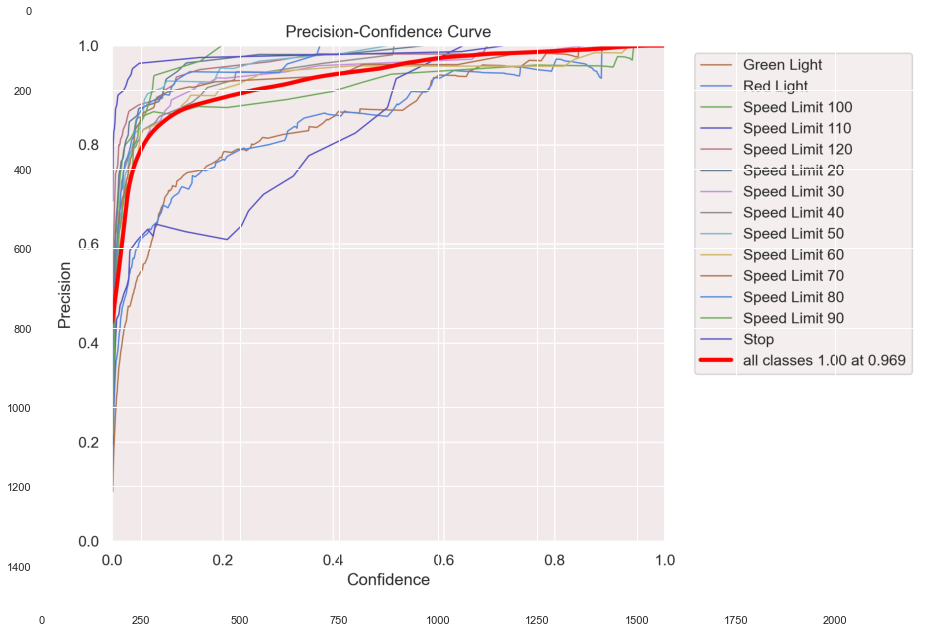

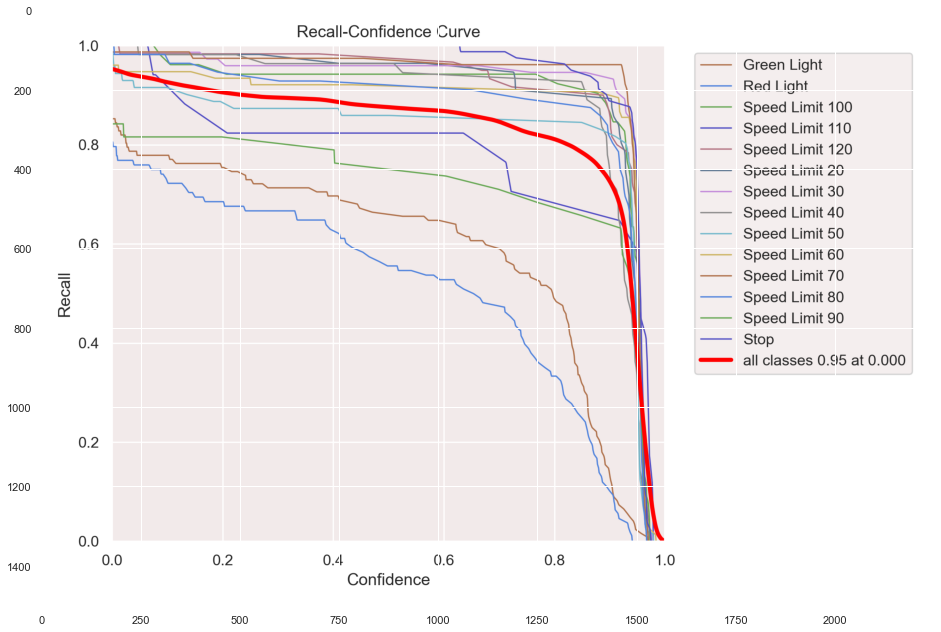

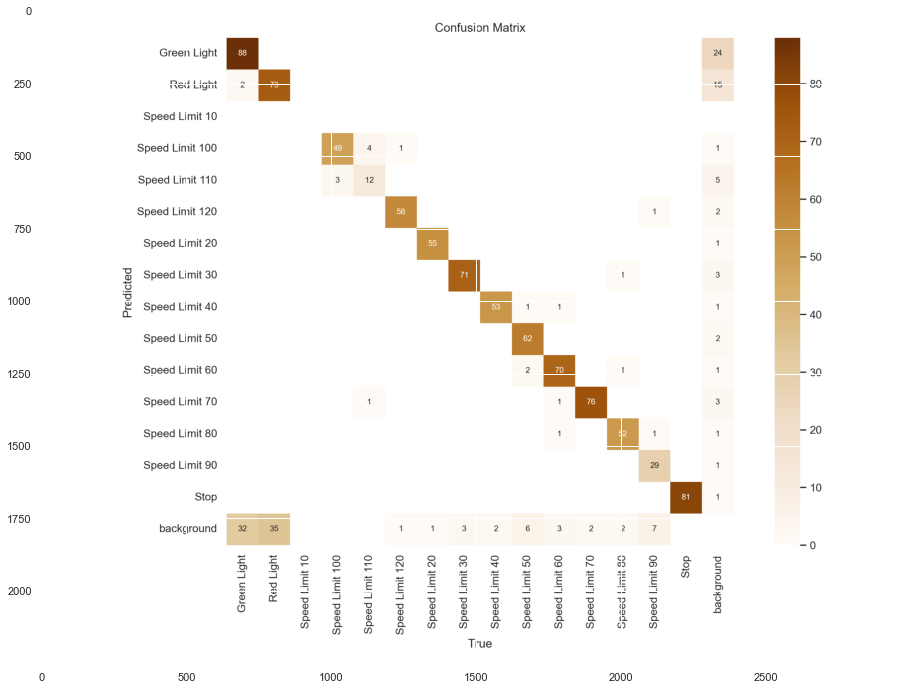

In [16]:
# Load the image
for i in list_of_metrics:
    image = cv2.imread(f'C:/Users/Dhairya Parikh/Desktop/PROJECT-1-Real Time Traffic Sign Detection Using YOLOv8/runs/detect/train11/{i}')

    # Create a larger figure
    plt.figure(figsize=(16, 12))

    # Display the image
    plt.imshow(image)

    # Show the plot
    plt.show()

In [17]:
Result_Final_model = pd.read_csv('C:/Users/Dhairya Parikh/Desktop/PROJECT-1-Real Time Traffic Sign Detection Using YOLOv8/runs/detect/train11/results.csv')
Result_Final_model.tail(10)

,epoch,time,train/box_loss,train/cls_loss,train/dfl_loss,metrics/precision(B),metrics/recall(B),metrics/mAP50(B),metrics/mAP50-95(B),val/box_loss,val/cls_loss,val/dfl_loss,lr/pg0,lr/pg1,lr/pg2
90,91,1788.10,0.44732,0.27371,0.83906,0.93761,0.87894,0.93311,0.82026,0.50355,0.29328,0.86414,0.000057,0.000057,0.000057
91,92,1807.94,0.43545,0.26066,0.84112,0.96662,0.86709,0.93521,0.82040,0.50484,0.28962,0.86552,0.000052,0.000052,0.000052
92,93,1826.23,0.43207,0.25950,0.83857,0.95671,0.87308,0.93597,0.81844,0.50792,0.28697,0.86820,0.000047,0.000047,0.000047
93,94,1844.96,0.42802,0.25554,0.84404,0.94025,0.88246,0.93704,0.81982,0.50496,0.28844,0.86600,0.000042,0.000042,0.000042
94,95,1863.47,0.42184,0.25115,0.84289,0.97227,0.86097,0.93566,0.82006,0.50712,0.28676,0.86644,0.000037,0.000037,0.000037
95,96,1881.33,0.42423,0.25206,0.83785,0.96951,0.87018,0.93402,0.82104,0.50642,0.28991,0.86792,0.000031,0.000031,0.000031
96,97,1900.20,0.42308,0.24851,0.84005,0.96090,0.86940,0.93507,0.82062,0.50556,0.28998,0.86628,0.000026,0.000026,0.000026
97,98,1918.69,0.41496,0.24397,0.83965,0.96788,0.86793,0.93515,0.82160,0.50639,0.28485,0.86668,0.000021,0.000021,0.000021
98,99,1937.23,0.41645,0.24778,0.83859,0.96289,0.87003,0.93582,0.82283,0.50431,0.28227,0.86588,0.000016,0.000016,0.000016
99,100,1955.41,0.42146,0.24539,0.83794,0.97086,0.87009,0.93646,0.82431,0.50266,0.28204,0.86544,0.000010,0.000010,0.000010


In [18]:
# Read the results.csv file as a pandas dataframe
Result_Final_model.columns = df.columns.str.strip()

# Create subplots
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(15, 15))

# Plot the columns using seaborn
sns.lineplot(x='epoch', y='train/box_loss', data=df, ax=axs[0,0])
sns.lineplot(x='epoch', y='train/cls_loss', data=df, ax=axs[0,1])
sns.lineplot(x='epoch', y='train/dfl_loss', data=df, ax=axs[1,0])
sns.lineplot(x='epoch', y='metrics/precision(B)', data=df, ax=axs[1,1])
sns.lineplot(x='epoch', y='metrics/recall(B)', data=df, ax=axs[2,0])
sns.lineplot(x='epoch', y='metrics/mAP50(B)', data=df, ax=axs[2,1])
sns.lineplot(x='epoch', y='metrics/mAP50-95(B)', data=df, ax=axs[3,0])
sns.lineplot(x='epoch', y='val/box_loss', data=df, ax=axs[3,1])
sns.lineplot(x='epoch', y='val/cls_loss', data=df, ax=axs[4,0])
sns.lineplot(x='epoch', y='val/dfl_loss', data=df, ax=axs[4,1])

# Set titles and axis labels for each subplot
axs[0,0].set(title='Train Box Loss')
axs[0,1].set(title='Train Class Loss')
axs[1,0].set(title='Train DFL Loss')
axs[1,1].set(title='Metrics Precision (B)')
axs[2,0].set(title='Metrics Recall (B)')
axs[2,1].set(title='Metrics mAP50 (B)')
axs[3,0].set(title='Metrics mAP50-95 (B)')
axs[3,1].set(title='Validation Box Loss')
axs[4,0].set(title='Validation Class Loss')
axs[4,1].set(title='Validation DFL Loss')


plt.suptitle('Training Metrics and Loss', fontsize=24)
plt.subplots_adjust(top=0.8)
plt.tight_layout()
plt.show()

NameError: name 'df' is not defined

# <p style="background-color:#1a8cff;font-family:newtimeroman;color:white;text-align:center;font-size:120%;border-radius:20px 60px;">Validation of the Model By TestSet:</p>

In [19]:
# Loading the best performing model
Valid_model = YOLO('C:/Users/Dhairya Parikh/Desktop/PROJECT-1-Real Time Traffic Sign Detection Using YOLOv8/runs/detect/train11/weights/best.pt')

# Evaluating the model on the testset
metrics = Valid_model.val(split = 'test')

Ultralytics 8.3.27  Python-3.9.7 torch-2.5.1+cu124 CUDA:0 (NVIDIA GeForce RTX 3060 Laptop GPU, 6144MiB)
YOLOv8n summary (fused): 168 layers, 3,008,573 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning C:\Users\Dhairya Parikh\Desktop\PROJECT-1-Real Time Traffic Sign Detection Using YOLOv8\datasets\Self-Driving Cars.v6-version-4-prescan-416x416.yolov8\test\labels... 638 images, 1 backgrounds, 0 corrupt: 100%|██████████| 638/638 [00:01<00:00, 488.51it/s]

val: New cache created: C:\Users\Dhairya Parikh\Desktop\PROJECT-1-Real Time Traffic Sign Detection Using YOLOv8\datasets\Self-Driving Cars.v6-version-4-prescan-416x416.yolov8\test\labels.cache



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:06<00:00,  6.59it/s]


                   all        638        770      0.891      0.891      0.932        0.8
           Green Light         77        110      0.882      0.816      0.878      0.531
             Red Light         71         94       0.79      0.638      0.726      0.461
        Speed Limit 10          2          3      0.731      0.924      0.913      0.674
       Speed Limit 100         45         46      0.864      0.935      0.979      0.861
       Speed Limit 110         21         21      0.942      0.772      0.853      0.756
       Speed Limit 120         40         44      0.895      0.977      0.974      0.891
        Speed Limit 20         46         46      0.914      0.978       0.99      0.903
        Speed Limit 30         60         60       0.92      0.883      0.947      0.889
        Speed Limit 40         51         53      0.936      0.962      0.982      0.879
        Speed Limit 50         47         50      0.858       0.86      0.928      0.826
        Speed Limit 6

In [20]:
# final results 
print("precision(B): ", metrics.results_dict["metrics/precision(B)"])
print("metrics/recall(B): ", metrics.results_dict["metrics/recall(B)"])
print("metrics/mAP50(B): ", metrics.results_dict["metrics/mAP50(B)"])
print("metrics/mAP50-95(B): ", metrics.results_dict["metrics/mAP50-95(B)"])

precision(B):  0.8908977644367678
metrics/recall(B):  0.8909675920142579
metrics/mAP50(B):  0.9318975498967486
metrics/mAP50-95(B):  0.7996766429690292


**Tip: Based on the observed results, it is evident that the accuracy of the model on both the validation and test data sets exhibits a high degree of similarity. This outcome serves as an indication that the model has been appropriately trained.**

# <p style="background-color:#1a8cff;font-family:newtimeroman;color:white;text-align:center;font-size:120%;border-radius:20px 60px;">Making Prediction:</p>

In [21]:
# Path to the directory containing the images
image_dir = 'C:/Users/Dhairya Parikh/Desktop/PROJECT-1-Real Time Traffic Sign Detection Using YOLOv8/datasets/Self-Driving Cars.v6-version-4-prescan-416x416.yolov8/test/images'  

# Get a list of all image files in the directory
image_files = [os.path.join(image_dir, file) for file in os.listdir(image_dir) if file.endswith('.jpg')]

# Randomly select 10 images from the directory
random_images = random.sample(image_files, k=10)

for image_path in random_images:
    image = cv2.imread(image_path)  # Replace with your preferred method of reading the image
    results = Final_model.predict([image], save=True, imgsz=416, conf=0.5, iou=0.7)
    #results.append(result)


0: 416x416 1 Speed Limit 110, 13.8ms
Speed: 16.3ms preprocess, 13.8ms inference, 6.8ms postprocess per image at shape (1, 3, 416, 416)
Results saved to runs\detect\train112

0: 416x416 2 Red Lights, 13.1ms
Speed: 0.6ms preprocess, 13.1ms inference, 6.1ms postprocess per image at shape (1, 3, 416, 416)
Results saved to runs\detect\train113

0: 416x416 1 Speed Limit 30, 13.6ms
Speed: 2.0ms preprocess, 13.6ms inference, 2.0ms postprocess per image at shape (1, 3, 416, 416)
Results saved to runs\detect\train114

0: 416x416 1 Speed Limit 60, 16.9ms
Speed: 1.0ms preprocess, 16.9ms inference, 2.8ms postprocess per image at shape (1, 3, 416, 416)
Results saved to runs\detect\train115

0: 416x416 1 Speed Limit 120, 12.9ms
Speed: 2.3ms preprocess, 12.9ms inference, 2.0ms postprocess per image at shape (1, 3, 416, 416)
Results saved to runs\detect\train116

0: 416x416 (no detections), 13.1ms
Speed: 2.0ms preprocess, 13.1ms inference, 1.0ms postprocess per image at shape (1, 3, 416, 416)
Results 

In [22]:
# View results
for i in range(2,12):
    plt.imshow(plt.imread(f'/kaggle/working/runs/detect/train{i}/image0.jpg'))
    plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '/kaggle/working/runs/detect/train2/image0.jpg'

### <b> <span style='color:#1a8cff'></span> Export The Final Model Of Detect Traffic Signs </b>

**Tip:** The ultimate goal of training a model is to deploy it for real-world applications. Export mode in Ultralytics YOLOv8 offers a versatile range of options for exporting your trained model to different formats, making it deployable across various platforms and devices.

In [ ]:
# Export the model
video_model.export(format='onnx')

In [ ]:
# Convert mp4
!ffmpeg -y -loglevel panic -i /kaggle/input/cardetection/video.mp4 output.mp4

# Display the video
Video("output.mp4", width=960)

# <p style="background-color:#1a8cff;font-family:newtimeroman;color:white;text-align:center;font-size:120%;border-radius:20px 60px;">Predict By Pr-Trained YOLOv8:</p>

In [ ]:
# Load a pr-trained model
video_model = YOLO("yolov8n.pt")
 
# Use the model to detect signs
video_model.predict(source="/kaggle/input/cardetection/video.mp4", show=True, save = True)

In [ ]:
# show result
# Convert format
!ffmpeg -y -loglevel panic -i /kaggle/working/runs/detect/predict/video.avi result_out.mp4

# Display the video 
Video("result_out.mp4", width=960)